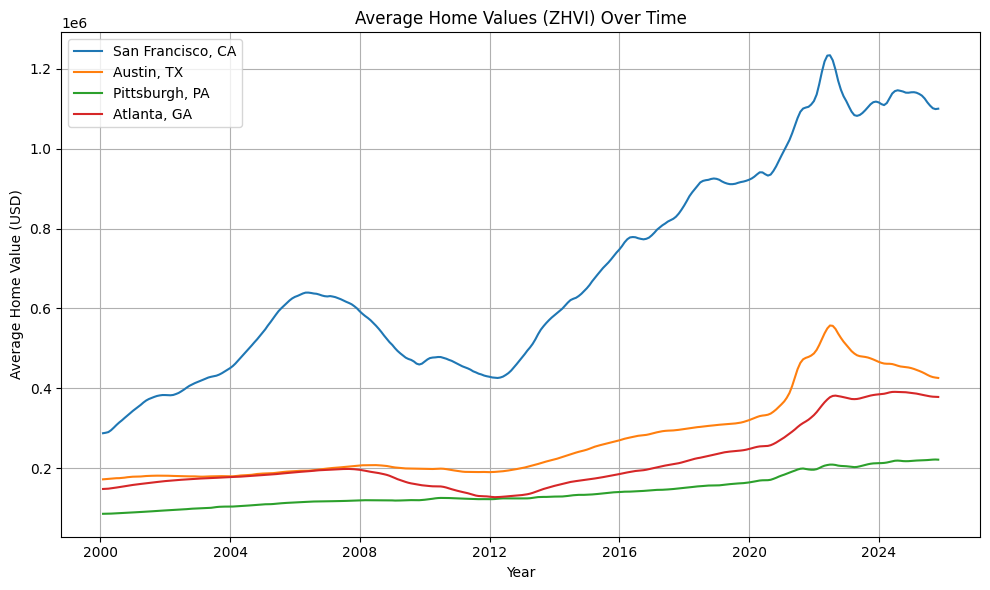

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

zhvi = pd.read_csv("Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

def filter_date_columns(df):
    date_cols = [c for c in df.columns if c[:4].isdigit()]
    keep_cols = ["RegionName"] + date_cols
    return df[keep_cols]

zhvi = filter_date_columns(zhvi)

cities = ["San Francisco, CA", "Austin, TX", "Pittsburgh, PA", "Atlanta, GA"]
zhvi = zhvi[zhvi["RegionName"].isin(cities)]

zhvi_t = zhvi.set_index("RegionName").T
zhvi_t.index = pd.to_datetime(zhvi_t.index, format="%Y-%m-%d")

plt.figure(figsize=(10, 6))
for city in cities:
    plt.plot(zhvi_t.index, zhvi_t[city], label=city)

plt.title("Average Home Values (ZHVI) Over Time")
plt.xlabel("Year")
plt.ylabel("Average Home Value (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("Figure1_ZHVI_trend_FIXED.png", dpi=300)
plt.show()